# XPS data for water on HOPG

In [2]:
# Import necessary modules
import os
import math
import cmath
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
import scipy.constants as constants
import seaborn as sns
import sympy as sp
from sympy import symbols, diff
from collections import defaultdict
from IPython.display import Image, HTML, Markdown
import openpyxl
import xlrd
import glob
%run define_functions.ipynb

        BE       data          fit         BkGd       peak2       peak3  \
0  530.156  1132.9221  1224.093105  1224.049840  505.964965  505.938102   
1  530.256  1184.1857  1224.103016  1224.022656  505.981710  505.938105   
2  530.356  1175.8958  1224.145643  1223.995472  506.008085  505.938114   
3  530.456  1205.3591  1224.249673  1223.968287  506.049131  505.938138   
4  530.556  1171.2749  1224.467636  1223.941103  506.112245  505.938201   

        peak4  
0  505.954498  
1  505.974845  
2  506.018273  
3  506.108417  
4  506.290386  


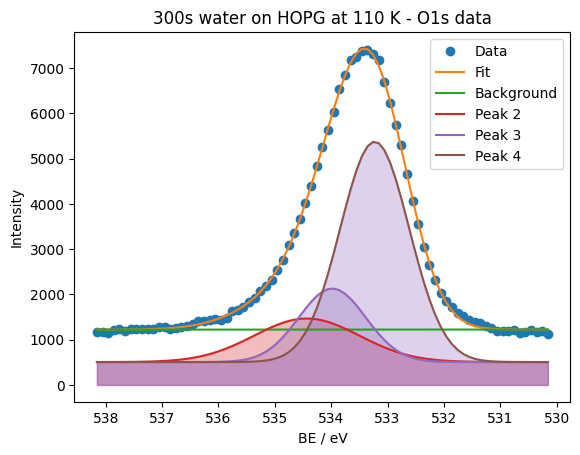

In [34]:
## Show example peak fit

path = 'XPS_data/'
filename  = 'O1s_110K_thin.txt'
df = pd.read_csv(path+filename, delimiter=r'\s+', 
                 names=['BE', 'data','fit','BkGd','peak2','peak3','peak4'], header = 0)
print(df.head())
BE = df.BE
# Plot the data
plt.plot(BE, df.data, 'o', label='Data')  # Fit data as dots
plt.plot(BE, df.fit, label='Fit')
plt.plot(BE, df.BkGd, label='Background')
plt.plot(BE, df.peak2, label='Peak 2')
plt.plot(BE, df.peak3, label='Peak 3')
plt.plot(BE, df.peak4, label='Peak 4')

# Fill the space between the lines and the x-axis
plt.fill_between(BE, df.peak2, color='C3', alpha=0.3)  # Same color as the line
plt.fill_between(BE, df.peak3, color='C4', alpha=0.3)  # Same color as the line
plt.fill_between(BE, df.peak4, color='C4', alpha=0.3)  # Same color as the line

# Invert the x-axis
plt.gca().invert_xaxis()

# Label the axes
plt.xlabel('BE / eV')
plt.ylabel('Intensity')

# Add a legend
plt.legend()

plt.title('300s water on HOPG at 110 K - O1s data')
plt.savefig('300s water on HOPG at 110 K - O1s data')

# Show the plot
plt.show()


                                                                                                                                                                                                                                                                                                                            O1s_f(T)_135K  \
1093.5498 1069.223845 1069.221540 1069.217638 4243.91455 4264.478075 4264.475503 4264.477307 7478.4803 7555.841742 7555.837840 7555.783531 10687.43745 10754.585374 10754.580556 10754.328304 13926.0862 13978.734061 13978.730167 13977.981916 17124.55335 17174.449453 17174.446365 17173.054834 NaN NaN NaN NaN NaN NaN            NaN   
1044.6831 1069.142036 1069.136780 1069.131691 4263.06275 4264.501624 4264.496040 4264.500306 7522.7958 7555.968895 7555.959792 7555.875611 10755.78275 10755.044010 10755.032685 10754.642869 13930.3694 13979.989063 13979.979776 13978.838633 17175.81695 17176.009770 17176.002353 17173.904191 NaN NaN NaN NaN NaN NaN            NaN   
1

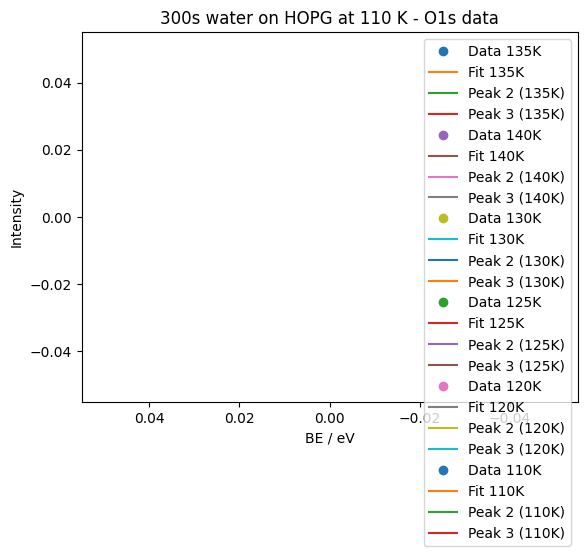

In [32]:
path = 'XPS_data/'
wavelength_file = 'O1s_Tdose_allpeaks.txt'
filename  = 'O1s_Tdose_allpeaks_V2.txt'
df = pd.read_csv(path+filename, delimiter=r'\s+', 
                 names=['O1s_f(T)_135K', 'O1s_f(T)_135Kfitresult', 'O1s_f(T)_135Kpeak 2', 'O1s_f(T)_135Kpeak 3',
'O1s_f(T)_140K', 'O1s_f(T)_140Kfitresult', 'O1s_f(T)_140Kpeak 2', 'O1s_f(T)_140Kpeak 3', 
'O1s_f(T)_130K', 'O1s_f(T)_130fitresult', 'O1s_f(T)_130peak 2', 'O1s_f(T)_130peak 3', 
'O1s_f(T)_125K', 'O1s_f(T)_125Kfitresult', 'O1s_f(T)_125Kpeak 2', 'O1s_f(T)_125Kpeak 3', 
'O1s_f(T)_120K', 'O1s_f(T)_120Kfitresult', 'O1s_f(T)_120Kpeak 2', 'O1s_f(T)_120Kpeak 3', 
'O1s_f(T)_110K', 'O1s_f(T)_110Kfitresult', 'O1s_f(T)_110Kpeak 2', 'O1s_f(T)_110Kpeak 3'], header = 0)
print(df.head())
#print(df['O1s_f(T)_135K'])

df_wavelength = pd.read_csv(path + wavelength_file, delimiter=r'\s+', names = ['wavelength'], header = 0, usecols=[0])
#print(df_wavelength.head())
wavelength = df_wavelength.wavelength
import matplotlib.pyplot as plt

# Assuming 'wavelength' is already defined and 'df' is your DataFrame

# Plot the data for each temperature
plt.plot(wavelength, df['O1s_f(T)_135K'], 'o', label='Data 135K')
plt.plot(wavelength, df['O1s_f(T)_135Kfitresult'], label='Fit 135K')
plt.plot(wavelength, df['O1s_f(T)_135Kpeak 2'], label='Peak 2 (135K)')
plt.plot(wavelength, df['O1s_f(T)_135Kpeak 3'], label='Peak 3 (135K)')

plt.plot(wavelength, df['O1s_f(T)_140K'], 'o', label='Data 140K')
plt.plot(wavelength, df['O1s_f(T)_140Kfitresult'], label='Fit 140K')
plt.plot(wavelength, df['O1s_f(T)_140Kpeak 2'], label='Peak 2 (140K)')
plt.plot(wavelength, df['O1s_f(T)_140Kpeak 3'], label='Peak 3 (140K)')

plt.plot(wavelength, df['O1s_f(T)_130K'], 'o', label='Data 130K')
plt.plot(wavelength, df['O1s_f(T)_130fitresult'], label='Fit 130K')
plt.plot(wavelength, df['O1s_f(T)_130peak 2'], label='Peak 2 (130K)')
plt.plot(wavelength, df['O1s_f(T)_130peak 3'], label='Peak 3 (130K)')

plt.plot(wavelength, df['O1s_f(T)_125K'], 'o', label='Data 125K')
plt.plot(wavelength, df['O1s_f(T)_125Kfitresult'], label='Fit 125K')
plt.plot(wavelength, df['O1s_f(T)_125Kpeak 2'], label='Peak 2 (125K)')
plt.plot(wavelength, df['O1s_f(T)_125Kpeak 3'], label='Peak 3 (125K)')

plt.plot(wavelength, df['O1s_f(T)_120K'], 'o', label='Data 120K')
plt.plot(wavelength, df['O1s_f(T)_120Kfitresult'], label='Fit 120K')
plt.plot(wavelength, df['O1s_f(T)_120Kpeak 2'], label='Peak 2 (120K)')
plt.plot(wavelength, df['O1s_f(T)_120Kpeak 3'], label='Peak 3 (120K)')

plt.plot(wavelength, df['O1s_f(T)_110K'], 'o', label='Data 110K')
plt.plot(wavelength, df['O1s_f(T)_110Kfitresult'], label='Fit 110K')
plt.plot(wavelength, df['O1s_f(T)_110Kpeak 2'], label='Peak 2 (110K)')
plt.plot(wavelength, df['O1s_f(T)_110Kpeak 3'], label='Peak 3 (110K)')

# Fill the space between the lines and the x-axis for each temperature
plt.fill_between(wavelength, df['O1s_f(T)_135Kpeak 2'], color='C0', alpha=0.3)  # Same color as the line
plt.fill_between(wavelength, df['O1s_f(T)_135Kpeak 3'], color='C1', alpha=0.3)  # Same color as the line

plt.fill_between(wavelength, df['O1s_f(T)_140Kpeak 2'], color='C2', alpha=0.3)  # Same color as the line
plt.fill_between(wavelength, df['O1s_f(T)_140Kpeak 3'], color='C3', alpha=0.3)  # Same color as the line

plt.fill_between(wavelength, df['O1s_f(T)_130peak 2'], color='C4', alpha=0.3)  # Same color as the line
plt.fill_between(wavelength, df['O1s_f(T)_130peak 3'], color='C5', alpha=0.3)  # Same color as the line

plt.fill_between(wavelength, df['O1s_f(T)_125Kpeak 2'], color='C6', alpha=0.3)  # Same color as the line
plt.fill_between(wavelength, df['O1s_f(T)_125Kpeak 3'], color='C7', alpha=0.3)  # Same color as the line

plt.fill_between(wavelength, df['O1s_f(T)_120Kpeak 2'], color='C8', alpha=0.3)  # Same color as the line
plt.fill_between(wavelength, df['O1s_f(T)_120Kpeak 3'], color='C9', alpha=0.3)  # Same color as the line

plt.fill_between(wavelength, df['O1s_f(T)_110Kpeak 2'], color='C10', alpha=0.3)  # Same color as the line
plt.fill_between(wavelength, df['O1s_f(T)_110Kpeak 3'], color='C11', alpha=0.3)  # Same color as the line

# Invert the x-axis
plt.gca().invert_xaxis()

# Label the axes
plt.xlabel('BE / eV')
plt.ylabel('Intensity')

# Add a legend
plt.legend()

plt.title('300s water on HOPG at 110 K - O1s data')
plt.savefig('300s water on HOPG at 110 K - O1s data')

# Show the plot
plt.show()


   Temperature    Peak_pos
0          110  533.427553
1          135  533.418378
2          136  533.395719
3          137  533.397292
4          138  533.399896


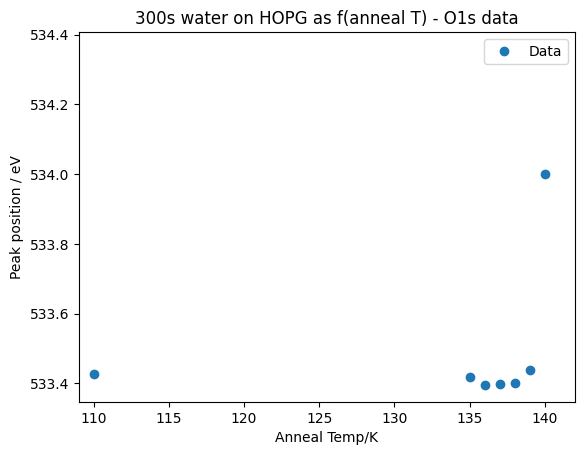

In [73]:
path = 'XPS_data/'
filename  = 'O1s_110K_peak_pos_anneal.txt'
df = pd.read_csv(path+filename, delimiter=r'\s+', 
                 names=['Temperature', 'Peak_pos'], header = 0)
print(df.head())

# Plot the data
plt.plot(df.Temperature, df.Peak_pos, 'o', label='Data')  # Fit data as dots

# Label the axes
plt.xlabel('Anneal Temp/K')
plt.ylabel('Peak position / eV')
plt.xlim(109,142)

# Add a legend
plt.legend()

plt.title('300s water on HOPG as f(anneal T) - O1s data')
plt.savefig('300s water on HOPG as f(anneal T) - O1s data')

# Show the plot
plt.show()

   Temperature    Peak_pos
0          135  533.292149
1          140  533.041702
2          130  533.349522
3          125  533.374940
4          120  533.410361


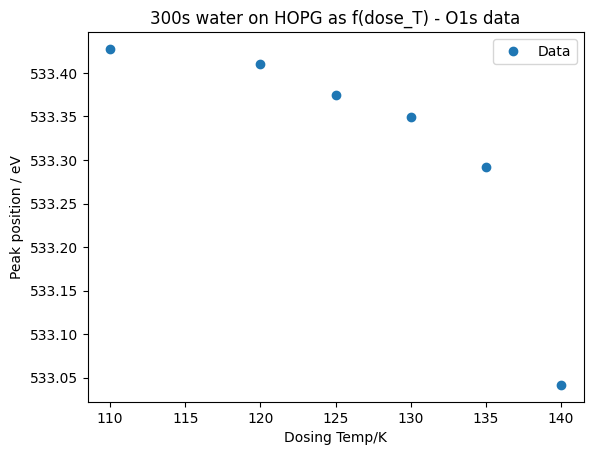

In [77]:
path = 'XPS_data/'
filename  = 'O1s_110K_peak_pos_dose.txt'
df = pd.read_csv(path+filename, delimiter=r'\s+', 
                 names=['Temperature', 'Peak_pos'], header = 0)
print(df.head())

# Plot the data
plt.plot(df.Temperature, df.Peak_pos, 'o', label='Data')  # Fit data as dots

# Label the axes
plt.xlabel('Dosing Temp/K')
plt.ylabel('Peak position / eV')

# Add a legend
plt.legend()

plt.title('300s water on HOPG as f(dose_T) - O1s data')
plt.savefig('300s water on HOPG as f(dose T) - O1s data')

# Show the plot
plt.show()